In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import nltk
import sklearn
from transformers import pipeline

In [2]:
meta_cols = ['movie_id', 'title', 'year', 'rating', 'no. votes', 'genres']
meta = pd.read_table(
    './datasets/movie-dialog-corpus/movie_titles_metadata.tsv', sep='\t', header=None, names=meta_cols, index_col='movie_id')


In [9]:
meta.head()

,title,year,rating,no. votes,genres
movie_id,,,,,
m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


In [3]:
dialog_texts = pd.read_pickle('./data/dialog_texts')

In [23]:
dialog_texts.head()

,first_char,second_char,movie_id,text
0,u0,u2,m0,Can we make this quick? Roxanne Korrine and A...
1,u0,u2,m0,You're asking me out. That's so cute. What's ...
2,u0,u2,m0,No no it's my fault -- we didn't have a proper...
3,u0,u2,m0,Why? Unsolved mystery. She used to be really ...
4,u0,u2,m0,Gosh if only we could find Kat a boyfriend... ...


In [10]:
def movie_texts(movie_id) -> pd.Series:
    return dialog_texts[dialog_texts['movie_id'] == movie_id]['text']

In [22]:
meta[meta.genres.apply(lambda x : 'comedy' in x)].index

Index(['m0', 'm4', 'm12', 'm13', 'm22', 'm24', 'm27', 'm31', 'm35', 'm38',
       ...
       'm573', 'm575', 'm579', 'm595', 'm598', 'm600', 'm602', 'm605', 'm607',
       'm615'],
      dtype='object', name='movie_id', length=159)

In [27]:
def genre_texts(genre, n):
    movies = meta[meta.genres.apply(lambda x: genre in x)].sample(n)
    return dialog_texts.join(movies, on="movie_id", how="inner")

genre_texts('comedy', 20)

,first_char,second_char,movie_id,text,title,year,rating,no. votes,genres
0,u0,u2,m0,Can we make this quick? Roxanne Korrine and A...,10 things i hate about you,1999,6.9,62847,['comedy' 'romance']
1,u0,u2,m0,You're asking me out. That's so cute. What's ...,10 things i hate about you,1999,6.9,62847,['comedy' 'romance']
2,u0,u2,m0,No no it's my fault -- we didn't have a proper...,10 things i hate about you,1999,6.9,62847,['comedy' 'romance']
3,u0,u2,m0,Why? Unsolved mystery. She used to be really ...,10 things i hate about you,1999,6.9,62847,['comedy' 'romance']
4,u0,u2,m0,Gosh if only we could find Kat a boyfriend... ...,10 things i hate about you,1999,6.9,62847,['comedy' 'romance']
...,...,...,...,...,...,...,...,...,...
94886,u9019,u9020,m615,Oh must be around ten... ten-thirty. Igor -- t...,young frankenstein,1974,8.0,57618,['comedy' 'sci-fi']
94887,u9019,u9020,m615,Another fifteen seconds to go. Do Something! ...,young frankenstein,1974,8.0,57618,['comedy' 'sci-fi']
94888,u9021,u9023,m615,Yes sir name please? Food! Do you have a reser...,young frankenstein,1974,8.0,57618,['comedy' 'sci-fi']
94889,u9021,u9023,m615,Drink! Oh no sir-ee. If yo don't have a reser...,young frankenstein,1974,8.0,57618,['comedy' 'sci-fi']


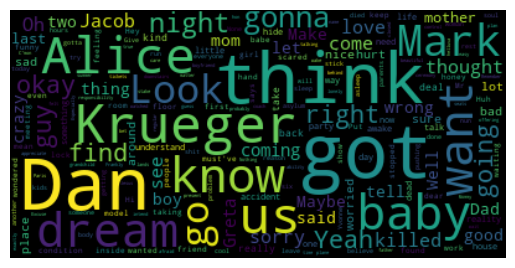

In [11]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=60).generate(' '.join(movie_texts('m8'))) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

In [5]:
from nltk.corpus import stopwords
from lexical_diversity import lex_div as ld

STOP_WORDS = set(stopwords.words('english'))


def is_word(string: str):
    return string.isalpha() and string.lower() not in STOP_WORDS


def tokenize(text):
    return [w for w in nltk.tokenize.word_tokenize(text) if is_word(w)]


def lexical_diversity(text):
    return ld.msttr(tokenize(text))


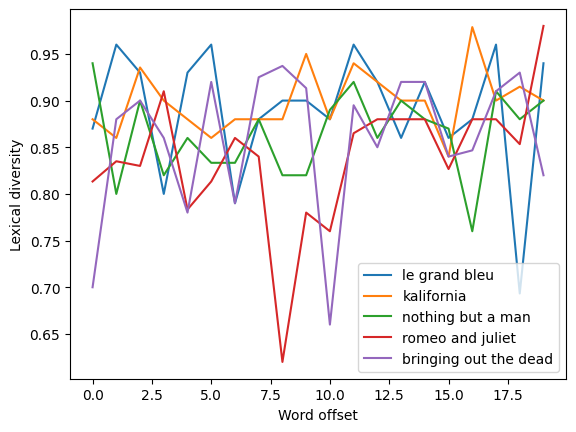

In [10]:
for mid, s in meta.sample(5).iterrows():
    texts = movie_texts(mid).to_list()
    data = [lexical_diversity(' '.join(ts)) for ts in np.array_split(texts, 20)]
    plt.plot(data, label=s['title'])
plt.legend()
plt.xlabel('Word offset') 
plt.ylabel('Lexical diversity') 
# plt.ylim(0, 1)
plt.show()

In [43]:
genre_texts('horror', 1)

,first_char,second_char,movie_id,text,title,year,rating,no. votes,genres
56598,u5273,u5281,m349,Kimberly Burroughs eh? What do you want? I th...,final destination 2,2003,6.4,36312,['horror' 'thriller']
56599,u5273,u5281,m349,It's not just about me. Someone I saved died ...,final destination 2,2003,6.4,36312,['horror' 'thriller']
56600,u5273,u5281,m349,The survivors of Flight 180 died in the exact ...,final destination 2,2003,6.4,36312,['horror' 'thriller']
56601,u5273,u5281,m349,Officer Burke pulled me away from the crash th...,final destination 2,2003,6.4,36312,['horror' 'thriller']
56602,u5273,u5281,m349,That's good. Get all your tears out now you'l...,final destination 2,2003,6.4,36312,['horror' 'thriller']
...,...,...,...,...,...,...,...,...,...
56692,u5283,u5288,m349,Damn it really hurts Mom. I know we'll be ther...,final destination 2,2003,6.4,36312,['horror' 'thriller']
56693,u5283,u5288,m349,What on Earth are they doing? Who am I David B...,final destination 2,2003,6.4,36312,['horror' 'thriller']
56694,u5283,u5288,m349,You're all certifiable you know that? I can't...,final destination 2,2003,6.4,36312,['horror' 'thriller']
56695,u5283,u5288,m349,Mom? Yeah? You think... You think those guys w...,final destination 2,2003,6.4,36312,['horror' 'thriller']


In [37]:
from nltk.text import Text

tokens = tokenize(' '.join(genre_texts('crime', 20).text))

In [38]:
txt = Text(tokens)

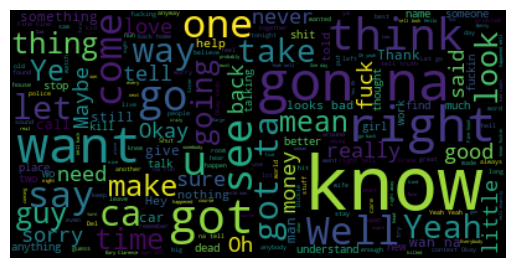

In [39]:
wordcloud = WordCloud(max_font_size=60).generate(' '.join(txt.tokens)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

In [41]:
txt.similar("money")

fuck get way right ta car wanted outta scared see take say going come
man well look would go night
